<a href="https://colab.research.google.com/github/Sireesha024/CS59000_06_Ethical_Artificial_Intelligence/blob/main/EthicalAI_Project_FinalCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kagglehub

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thovylnguyn/fakenewscorpus-full")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fakenewscorpus-full


In [ ]:
import pandas as pd
df = pd.read_csv("/kaggle/input/fakenewscorpus-full/news_cleaned_big.csv")

<ipython-input-28-9a1aa3755189>:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/fakenewscorpus-full/news_cleaned_big.csv")


In [ ]:
df.head()

,Unnamed: 0,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
0,0,2,express.co.uk,rumor,https://www.express.co.uk/news/science/738402/...,"Life is an illusion, at least on a quantum lev...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Is life an ILLUSION? Researchers prove 'realit...,Sean Martin,NaN,[''],THE UNIVERSE ceases to exist when we are not l...,NaN,NaN,NaN
1,1,6,barenakedislam.com,hate,http://barenakedislam.com/category/donald-trum...,"Unfortunately, he hasn’t yet attacked her for ...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Donald Trump,"Linda Rivera, Conrad Calvano, Az Gal, Lincoln ...",NaN,[''],NaN,NaN,NaN,NaN
2,2,7,barenakedislam.com,hate,http://barenakedislam.com/category/donald-trum...,The Los Angeles Police Department has been den...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Donald Trump,"Linda Rivera, Conrad Calvano, Az Gal, Lincoln ...",NaN,[''],NaN,NaN,NaN,NaN
3,3,8,barenakedislam.com,hate,http://barenakedislam.com/2017/12/24/more-winn...,The White House has decided to quietly withdra...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,"MORE WINNING! Israeli intelligence source, DEB...","Cleavis Nowell, Cleavisnowell, Clarence J. Fei...",NaN,[''],NaN,NaN,NaN,NaN
4,4,9,barenakedislam.com,hate,http://barenakedislam.com/2017/12/25/oh-trump-...,“The time has come to cut off the tongues of t...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,"“Oh, Trump, you coward, you just wait, we will...","F.N. Lehner, Don Spilman, Clarence J. Feinour,...",NaN,[''],NaN,NaN,NaN,NaN


In [ ]:
columns_to_drop = [
    'Unnamed: 0', 'url', 'scraped_at', 'inserted_at', 'updated_at', 'meta_keywords', 'source','keywords','meta_description', 'tags','summary','authors'
]

In [ ]:
# Drop the unnecessary columns
df = df.drop(columns=columns_to_drop)

In [ ]:
unique_targets = df['type'].unique()
unique_targets

array(['rumor', 'hate', 'unreliable', 'conspiracy', 'clickbait', 'satire',
       'fake', 'reliable', 'bias', 'political', 'junksci', nan, 'unknown',
       '2018-02-02 01:19:41.756664', '2018-02-07 23:39:33.852696',
       '2017-11-10T11:18:44.524042', '2018-02-08 19:18:34.468066',
       ' including Iraq', '2018-02-08 19:18:34.468038',
       '” said Linton Roberts', '2018-02-10 13:43:39.521661'],
      dtype=object)

In [ ]:
relevant_labels = ['fake','reliable','bias','clickbait','conspiracy','unreliable']

# Filter the dataset to keep only rows with relevant labels
df_filtered = df[df['type'].isin(relevant_labels)]

# Check the updated unique target variables
print("Updated unique target variables:")
print(df_filtered['type'].unique())

# Check the frequency of each remaining target variable
print("\nFrequency of each target variable:")
print(df_filtered['type'].value_counts())


Updated unique target variables:
['unreliable' 'conspiracy' 'clickbait' 'fake' 'reliable' 'bias']

Frequency of each target variable:
type
reliable      1913222
bias          1138998
fake           894746
conspiracy     831235
unreliable     298784
clickbait      231949
Name: count, dtype: int64


In [ ]:
df_filtered.head()

,id,domain,type,content,title
6,11,blackagendareport.com,unreliable,UN-Backed Police Massacred Haitians With Impun...,UN-Backed Police Massacred Haitians With Impunity
7,13,blackagendareport.com,unreliable,It should have come as no surprise that the sa...,Black Agenda Report
8,14,blackagendareport.com,unreliable,"“When the police finally left the campus, arou...",Black Agenda Report
9,15,blackagendareport.com,unreliable,Zambia Must Clarify Whether It Will Host Israe...,Zambia Must Clarify Whether It Will Host Israe...
10,17,blackgenocide.org,conspiracy,\n\n\n\n\n\n\n\nRev Dr. Childress is available...,BlackGenocide.org


In [ ]:
df_filtered.loc[:, 'title'] = df_filtered['title'].fillna("Unknown title")

In [ ]:
nan_rows = df_filtered[df_filtered.isna().any(axis=1)]

# Display the NaN rows
print("Rows with NaN values:")
print(nan_rows)

# Count the number of NaN rows
print("\nNumber of NaN rows:", len(nan_rows))

Rows with NaN values:
               id             domain      type content          title
9682564   7997447  feeds.reuters.com  reliable     NaN  Unknown title
9805020   8121160  feeds.reuters.com  reliable     NaN  Unknown title
9806353   8122501  feeds.reuters.com  reliable     NaN  Unknown title
9829528   8145787  feeds.reuters.com  reliable     NaN  Unknown title
9924440   8241928  feeds.reuters.com  reliable     NaN  Unknown title
9939576   8257299  feeds.reuters.com  reliable     NaN  Unknown title
9944840   8262647  feeds.reuters.com  reliable     NaN  Unknown title
9950339   8268234  feeds.reuters.com  reliable     NaN  Unknown title
9953503   8271465  feeds.reuters.com  reliable     NaN  Unknown title
9961815   8279890  feeds.reuters.com  reliable     NaN  Unknown title
9975332   8293783  feeds.reuters.com  reliable     NaN  Unknown title
9977556   8296107  feeds.reuters.com  reliable     NaN  Unknown title
10002694  8321824    www.reuters.com  reliable     NaN  Unknown titl

In [ ]:
df_filtered.dropna()
df = df_filtered.copy()

In [ ]:
nan_rows = df[df.isna().any(axis=1)]

# Display the NaN rows
print("Rows with NaN values:")
print(nan_rows)

# Count the number of NaN rows
print("\nNumber of NaN rows:", len(nan_rows))

Rows with NaN values:
               id             domain      type content          title
9682564   7997447  feeds.reuters.com  reliable     NaN  Unknown title
9805020   8121160  feeds.reuters.com  reliable     NaN  Unknown title
9806353   8122501  feeds.reuters.com  reliable     NaN  Unknown title
9829528   8145787  feeds.reuters.com  reliable     NaN  Unknown title
9924440   8241928  feeds.reuters.com  reliable     NaN  Unknown title
9939576   8257299  feeds.reuters.com  reliable     NaN  Unknown title
9944840   8262647  feeds.reuters.com  reliable     NaN  Unknown title
9950339   8268234  feeds.reuters.com  reliable     NaN  Unknown title
9953503   8271465  feeds.reuters.com  reliable     NaN  Unknown title
9961815   8279890  feeds.reuters.com  reliable     NaN  Unknown title
9975332   8293783  feeds.reuters.com  reliable     NaN  Unknown title
9977556   8296107  feeds.reuters.com  reliable     NaN  Unknown title
10002694  8321824    www.reuters.com  reliable     NaN  Unknown titl

In [ ]:
# Check the frequency of each remaining target variable
print("\nFrequency of each target variable:")
print(df['type'].value_counts())


Frequency of each target variable:
type
reliable      1913222
bias          1138998
fake           894746
conspiracy     831235
unreliable     298784
clickbait      231949
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

<ipython-input-41-07f5ea4ab3da>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df_filtered, palette='viridis')


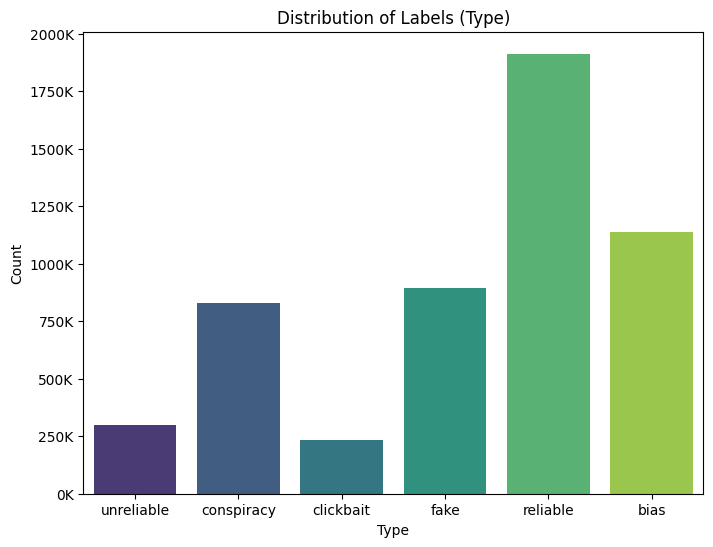

In [ ]:
# Distribution of labels (type)
def format_thousands(x, _):
    return f'{int(x/1000)}K'  # Convert to 'K' format

# Plot distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df_filtered, palette='viridis')
plt.title('Distribution of Labels (Type)')
plt.xlabel('Type')
plt.ylabel('Count')

# Apply the custom y-axis formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_thousands))

plt.show()

In [ ]:
df.head()

,id,domain,type,content,title
6,11,blackagendareport.com,unreliable,UN-Backed Police Massacred Haitians With Impun...,UN-Backed Police Massacred Haitians With Impunity
7,13,blackagendareport.com,unreliable,It should have come as no surprise that the sa...,Black Agenda Report
8,14,blackagendareport.com,unreliable,"“When the police finally left the campus, arou...",Black Agenda Report
9,15,blackagendareport.com,unreliable,Zambia Must Clarify Whether It Will Host Israe...,Zambia Must Clarify Whether It Will Host Israe...
10,17,blackgenocide.org,conspiracy,\n\n\n\n\n\n\n\nRev Dr. Childress is available...,BlackGenocide.org


In [ ]:
import re

def clean_text(text):
    if not isinstance(text, str):
        return ""
    # Keep letters, numbers, and basic whitespace
    cleaned = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Remove extra spaces/newlines if needed
    cleaned = re.sub(r'\s+', ' ', cleaned).strip()
    return cleaned

# Apply cleaning using .loc
df.loc[:, 'cleaned_content'] = df['content'].apply(clean_text)
df.loc[:, 'cleaned_title'] = df['title'].apply(clean_text)

In [ ]:
df.head()

,id,domain,type,content,title,cleaned_content,cleaned_title
6,11,blackagendareport.com,unreliable,UN-Backed Police Massacred Haitians With Impun...,UN-Backed Police Massacred Haitians With Impunity,UNBacked Police Massacred Haitians With Impuni...,UNBacked Police Massacred Haitians With Impunity
7,13,blackagendareport.com,unreliable,It should have come as no surprise that the sa...,Black Agenda Report,It should have come as no surprise that the sa...,Black Agenda Report
8,14,blackagendareport.com,unreliable,"“When the police finally left the campus, arou...",Black Agenda Report,When the police finally left the campus around...,Black Agenda Report
9,15,blackagendareport.com,unreliable,Zambia Must Clarify Whether It Will Host Israe...,Zambia Must Clarify Whether It Will Host Israe...,Zambia Must Clarify Whether It Will Host Israe...,Zambia Must Clarify Whether It Will Host Israe...
10,17,blackgenocide.org,conspiracy,\n\n\n\n\n\n\n\nRev Dr. Childress is available...,BlackGenocide.org,Rev Dr Childress is available to come to your ...,BlackGenocideorg


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5308934 entries, 6 to 11558722
Data columns (total 7 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   id               object
 1   domain           object
 2   type             object
 3   content          object
 4   title            object
 5   cleaned_content  object
 6   cleaned_title    object
dtypes: object(7)
memory usage: 324.0+ MB


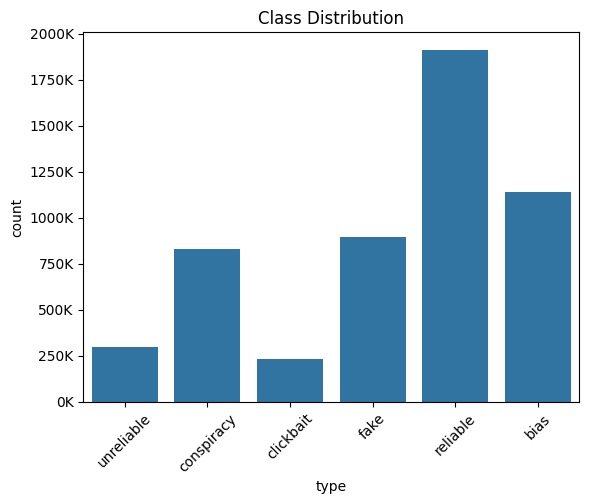

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Function to format y-axis labels in thousands (K)
def format_thousands(x, _):
    return f'{int(x/1000)}K'

# Create the countplot
sns.countplot(x='type', data=df)
plt.title("Class Distribution")
plt.xticks(rotation=45)

# Apply the custom formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_thousands))

plt.show()

In [ ]:
# Group by type and domain, then count
domain_counts = df.groupby(['type', 'domain']).size().reset_index(name='count')

# Sort within each label
domain_counts_sorted = domain_counts.sort_values(by=['type', 'count'], ascending=[True, False])

# Display top domains per class
for label in df['type'].unique():
    print(f"\nLabel: {label}")
    print(domain_counts_sorted[domain_counts_sorted['type'] == label].head(10))



Label: unreliable
           type                     domain   count
419  unreliable              wikileaks.org  199031
406  unreliable         morningnewsusa.com   14468
412  unreliable               theduran.com   13533
405  unreliable          morningledger.com   12459
418  unreliable              wikileaks.com    8821
413  unreliable  thefreethoughtproject.com    7646
397  unreliable         coasttocoastam.com    6120
395  unreliable             breakpoint.org    5987
402  unreliable            libertynews.com    5347
396  unreliable                cnnnext.com    4182

Label: conspiracy
           type                     domain   count
119  conspiracy         abovetopsecret.com  238622
196  conspiracy             wikispooks.com   80683
182  conspiracy        thedailysheeple.com   51321
190  conspiracy  truthbroadcastnetwork.com   44274
186  conspiracy       thelibertybeacon.com   38027
198  conspiracy              zerohedge.com   36533
167  conspiracy             newstarget.com  

In [ ]:
types = ['fake','reliable','bias','clickbait','conspiracy','unreliable']
balanced_df = pd.DataFrame()

for type_ in types:
    # Get 50k random samples for the current type
    type_samples = df[df['type'] == type_].sample(n=50000, random_state=42)
    # Append to the balanced DataFrame
    balanced_df = pd.concat([balanced_df, type_samples])

# Now 'balanced_df' contains your balanced dataset
print(balanced_df['type'].value_counts())
df = balanced_df.copy()

type
fake          50000
reliable      50000
bias          50000
clickbait     50000
conspiracy    50000
unreliable    50000
Name: count, dtype: int64


In [ ]:
# Group by type and domain, then count
domain_counts = df.groupby(['type', 'domain']).size().reset_index(name='count')

# Sort within each label
domain_counts_sorted = domain_counts.sort_values(by=['type', 'count'], ascending=[True, False])

# Display top domains per class
for label in df['type'].unique():
    print(f"\nLabel: {label}")
    print(domain_counts_sorted[domain_counts_sorted['type'] == label].head(10))



Label: fake
     type                    domain  count
187  fake         beforeitsnews.com  43617
243  fake  threepercenternation.com   1351
238  fake             thenet24h.com    949
190  fake                  coed.com    638
236  fake       theinternetpost.net    624
235  fake        thefreepatriot.org    461
216  fake         newswithviews.com    309
241  fake      thetruthdivision.com    199
240  fake         therightscoop.com    194
223  fake      realnewsrightnow.com    166

Label: reliable
         type                  domain  count
289  reliable             nytimes.com  40279
331  reliable         www.reuters.com    828
340  reliable           www.yahoo.com    606
332  reliable          www.sfgate.com    578
270  reliable       christianpost.com    537
307  reliable           www.chron.com    494
285  reliable          news.yahoo.com    454
296  reliable    uk.finance.yahoo.com    341
278  reliable       indianexpress.com    295
315  reliable  www.huffingtonpost.com    278

L

In [ ]:
df.head()

,id,domain,type,content,title,cleaned_content,cleaned_title
6414370,4531396,beforeitsnews.com,fake,Research Reveals Stoller Technology Improves P...,Research Reveals Stoller Technology Improves P...,Research Reveals Stoller Technology Improves P...,Research Reveals Stoller Technology Improves P...
7758559,6233720,beforeitsnews.com,fake,Interview with Henry Kissinger: 'Do We Achieve...,Interview with Henry Kissinger: 'Do We Achieve...,Interview with Henry Kissinger Do We Achieve W...,Interview with Henry Kissinger Do We Achieve W...
8194434,6794857,beforeitsnews.com,fake,Microsoft’s Big Plans For The Surface Pro? Col...,Microsoft’s Big Plans For The Surface Pro? Col...,Microsofts Big Plans For The Surface Pro Color...,Microsofts Big Plans For The Surface Pro Color...
7339182,5619735,thefreepatriot.org,fake,A man in South Africa confessed to cannibalism...,Man Slams Bag of Body Parts on Police Station ...,A man in South Africa confessed to cannibalism...,Man Slams Bag of Body Parts on Police Station ...
8803930,7555137,beforeitsnews.com,fake,(Before It's News)\n\nA Readers Guide summariz...,Readers Guide To Suppressed Report On Funders ...,Before Its News A Readers Guide summarizing ne...,Readers Guide To Suppressed Report On Funders ...


In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 109.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 112.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 122.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.8 MB/s eta 0:00:00


In [ ]:
#LSTM
import pandas as pd
import numpy as np
import tensorflow as tf
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Step 3: Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['type'])

# Step 4: Create input text by combining fields
texts = (
    df['domain'] + ' ' +
    df['cleaned_title'] + ' ' +
    df['cleaned_content']
)

# Step 5: Tokenize and pad
tokenizer = Tokenizer(num_words=50000, oov_token='')
tokenizer.fit_on_texts(texts)
X = tokenizer.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=300)

# Step 6: Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: TPU support or fallback
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()

# Step 8: Build and train LSTM model
with strategy.scope():
    model = Sequential([
        Embedding(50000, 128, input_length=300),
        LSTM(64),
        Dense(32, activation='relu'),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=3, batch_size=256, validation_data=(X_test, y_test), verbose=1)

# Step 9: Evaluate model
y_pred_probs = model.predict(X_test, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)
print(classification_report(
    y_test, y_pred,
    labels=range(len(label_encoder.classes_)),
    target_names=label_encoder.classes_,
    zero_division=0
))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 1310s 1s/step - accuracy: 0.6760 - loss: 0.8977 - val_accuracy: 0.8216 - val_loss: 0.5071
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 1255s 1s/step - accuracy: 0.8119 - loss: 0.5451 - val_accuracy: 0.8081 - val_loss: 0.5630
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 1253s 1s/step - accuracy: 0.8581 - loss: 0.4280 - val_accuracy: 0.8542 - val_loss: 0.4512
              precision    recall  f1-score   support

        bias       0.93      0.77      0.84      9980
   clickbait       0.90      0.84      0.87     10035
  conspiracy       0.67      0.89      0.77     10136
        fake       0.93      0.85      0.89     10009
    reliable       0.90      0.90      0.90      9918
  unreliable       0.88      0.88      0.88      9922

    accuracy                           0.85     60000
   macro avg       0.87      0.85      0.86     60000
weighted avg       0.87      0.85      0.86     60000



In [ ]:
# Step 10: Save model and encoders
model.save("lstm_balanced_model.h5")
with open("lstm_label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)
with open("lstm_tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)


In [ ]:
#cnn

import pandas as pd
import numpy as np
import tensorflow as tf
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense


# Step 3: Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['type'])

# Step 4: Combine text fields
texts = (
    df['domain'] + ' ' +
    df['cleaned_title'] + ' ' +
    df['cleaned_content']
)

# Step 5: Tokenize and pad
tokenizer = Tokenizer(num_words=50000, oov_token='')
tokenizer.fit_on_texts(texts)
X = tokenizer.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=300)

# Step 6: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Use TPU if available
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()

# Step 8: Build and train CNN
with strategy.scope():
    model = Sequential([
        Embedding(50000, 128, input_length=300),
        Conv1D(128, kernel_size=5, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(32, activation='relu'),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=3, batch_size=256, validation_data=(X_test, y_test), verbose=1)

# Step 9: Evaluate
y_pred_probs = model.predict(X_test, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)

print(classification_report(
    y_test, y_pred,
    labels=range(len(label_encoder.classes_)),
    target_names=label_encoder.classes_,
    zero_division=0
))

# Step 10: Save model and supporting files
model.save("cnn_balanced_model.h5")
with open("CNN_label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)
with open("CNN_tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 812s 863ms/step - accuracy: 0.7895 - loss: 0.6110 - val_accuracy: 0.9118 - val_loss: 0.2511
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 785s 836ms/step - accuracy: 0.9469 - loss: 0.1611 - val_accuracy: 0.9127 - val_loss: 0.2568
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 786s 838ms/step - accuracy: 0.9907 - loss: 0.0425 - val_accuracy: 0.9165 - val_loss: 0.2863


              precision    recall  f1-score   support

        bias       0.88      0.89      0.89      9980
   clickbait       0.91      0.92      0.91     10035
  conspiracy       0.88      0.91      0.89     10136
        fake       0.95      0.90      0.92     10009
    reliable       0.93      0.95      0.94      9918
  unreliable       0.96      0.93      0.95      9922

    accuracy                           0.92     60000
   macro avg       0.92      0.92      0.92     60000
weighted avg       0.92      0.92      0.92     60000



In [ ]:
#LR
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import pickle


lr_label_encoder = LabelEncoder()
y = lr_label_encoder.fit_transform(df['type'])

texts = (
    df['domain'] + " " +
    df['cleaned_title'] + " " +
    df['cleaned_content']
)

# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=50000)
X = tfidf.fit_transform(texts)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict probabilities
y_pred_probs_lr = lr_model.predict_proba(X_test)
y_pred_lr = lr_model.predict(X_test)

# Evaluate
print(classification_report(
    y_test, y_pred_lr,
    labels=range(len(lr_label_encoder.classes_)),
    target_names=lr_label_encoder.classes_,
    zero_division=0
))

# Save model and TF-IDF vectorizer
with open("lr_model.pkl", "wb") as f:
    pickle.dump(lr_model, f)

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

with open("lr_label_encoder.pkl", "wb") as f:
    pickle.dump(lr_label_encoder, f)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

        bias       0.92      0.94      0.93      9980
   clickbait       0.94      0.97      0.96     10035
  conspiracy       0.93      0.94      0.93     10136
        fake       0.97      0.95      0.96     10009
    reliable       0.98      0.97      0.98      9918
  unreliable       0.99      0.94      0.97      9922

    accuracy                           0.95     60000
   macro avg       0.95      0.95      0.95     60000
weighted avg       0.95      0.95      0.95     60000



In [ ]:
import pickle
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

# Load CNN
cnn_model = load_model("/content/cnn_balanced_model.h5")
with open("/content/CNN_tokenizer.pkl", "rb") as f:
    cnn_tokenizer = pickle.load(f)
with open("/content/CNN_label_encoder.pkl", "rb") as f:
    cnn_label_encoder = pickle.load(f)

# Load LSTM
lstm_model = load_model("/content/lstm_balanced_model.h5")
with open("/content/lstm_tokenizer.pkl", "rb") as f:
    lstm_tokenizer = pickle.load(f)
with open("/content/lstm_label_encoder.pkl", "rb") as f:
    lstm_label_encoder = pickle.load(f)

# Load Logistic Regression
with open("/content/lr_model.pkl", "rb") as f:
    lr_model = pickle.load(f)
with open("/content/tfidf_vectorizer.pkl", "rb") as f:
    tfidf_vectorizer = pickle.load(f)
with open("/content/lr_label_encoder.pkl", "rb") as f:
    lr_label_encoder = pickle.load(f)

In [ ]:
assert np.array_equal(
    cnn_label_encoder.classes_,
    lstm_label_encoder.classes_
) and np.array_equal(
    cnn_label_encoder.classes_,
    lr_label_encoder.classes_
), "Label classes must match in all models!"

In [ ]:
def ensemble_predict(text, cnn_model, cnn_tokenizer, lstm_model, lstm_tokenizer, lr_model, tfidf_vectorizer, label_encoder, max_length=300):

    # CNN preprocessing
    cnn_seq = cnn_tokenizer.texts_to_sequences([text])
    cnn_input = pad_sequences(cnn_seq, maxlen=max_length)
    cnn_probs = cnn_model.predict(cnn_input, verbose=0)[0]

    # LSTM preprocessing
    lstm_seq = lstm_tokenizer.texts_to_sequences([text])
    lstm_input = pad_sequences(lstm_seq, maxlen=max_length)
    lstm_probs = lstm_model.predict(lstm_input, verbose=0)[0]

    # LR preprocessing
    lr_input = tfidf_vectorizer.transform([text])
    lr_probs = lr_model.predict_proba(lr_input)[0]

    # Average probabilities
    avg_probs = (cnn_probs + lstm_probs + lr_probs) / 3
    pred_class = np.argmax(avg_probs)

    return label_encoder.classes_[pred_class], avg_probs

In [ ]:
# Ensemble Prediction on Validation Set


# Encode labels
from sklearn.preprocessing import LabelEncoder
true_encoder = LabelEncoder()
y_true = true_encoder.fit_transform(df['type'])

# Confirm it matches
assert list(true_encoder.classes_) == list(cnn_label_encoder.classes_), "Label mismatch!"

# Prepare text
texts = (
    df['domain'] + ' ' +
    df['cleaned_title'] + ' ' +
    df['cleaned_content']
)

In [ ]:
# Step 1: Tokenize all texts once for each model

cnn_sequences = cnn_tokenizer.texts_to_sequences(texts)
cnn_padded = pad_sequences(cnn_sequences, maxlen=300)

lstm_sequences = lstm_tokenizer.texts_to_sequences(texts)
lstm_padded = pad_sequences(lstm_sequences, maxlen=300)

lr_input = tfidf_vectorizer.transform(texts)
cnn_probs_all = cnn_model.predict(cnn_padded, verbose=1)
lstm_probs_all = lstm_model.predict(lstm_padded, verbose=1)
lr_probs_all = lr_model.predict_proba(lr_input)

9375/9375 ━━━━━━━━━━━━━━━━━━━━ 171s 18ms/step
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 171s 18ms/step


In [ ]:
avg_probs_all = (cnn_probs_all + lstm_probs_all + lr_probs_all) / 3
y_pred_ensemble = np.argmax(avg_probs_all, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

y_true_numeric = true_encoder.transform(df['type'])

print(f"Ensemble Accuracy: {accuracy_score(y_true_numeric, y_pred_ensemble):.4f}")
print(f"Ensemble Macro F1: {f1_score(y_true_numeric, y_pred_ensemble, average='macro'):.4f}")

Ensemble Accuracy: 0.9870
Ensemble Macro F1: 0.9871


In [ ]:
# CNN
cnn_preds = np.argmax(cnn_probs_all, axis=1)
print("CNN Accuracy:", accuracy_score(y_true_numeric, cnn_preds))
print("CNN Macro F1:", f1_score(y_true_numeric, cnn_preds, average='macro'))

# LSTM
lstm_preds = np.argmax(lstm_probs_all, axis=1)
print("LSTM Accuracy:", accuracy_score(y_true_numeric, lstm_preds))
print("LSTM Macro F1:", f1_score(y_true_numeric, lstm_preds, average='macro'))

# LR
lr_preds = np.argmax(lr_probs_all, axis=1)
print("LR Accuracy:", accuracy_score(y_true_numeric, lr_preds))
print("LR Macro F1:", f1_score(y_true_numeric, lr_preds, average='macro'))

CNN Accuracy: 0.98239
CNN Macro F1: 0.9823975874510174
LSTM Accuracy: 0.76153
LSTM Macro F1: 0.7673820097338321
LR Accuracy: 0.96878
LR Macro F1: 0.9688393806869756


In [ ]:
print(classification_report(
    y_true, y_pred_ensemble,
    labels=range(len(true_encoder.classes_)),
    target_names=true_encoder.classes_,
    zero_division=0  # To handle cases where a class might not be present in predictions
))

              precision    recall  f1-score   support

        bias       0.98      0.98      0.98     50000
   clickbait       0.99      0.99      0.99     50000
  conspiracy       0.98      0.99      0.98     50000
        fake       0.99      0.98      0.99     50000
    reliable       0.99      0.99      0.99     50000
  unreliable       1.00      0.99      0.99     50000

    accuracy                           0.99    300000
   macro avg       0.99      0.99      0.99    300000
weighted avg       0.99      0.99      0.99    300000

